In [ ]:
#Forecasted values (blue line) extend into the future based on the model's predictions, and the historical data points (black dots) show the actual sales that occurred in the past.


In [4]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
import logging
import warnings
from prophet.diagnostics import performance_metrics
from prophet.plot import plot_cross_validation_metric


DEBUG:cmdstanpy:input tempfile: /tmp/tmpw0u4w8pr/bg4is6rv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw0u4w8pr/3cljdkke.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=53907', 'data', 'file=/tmp/tmpw0u4w8pr/bg4is6rv.json', 'init=/tmp/tmpw0u4w8pr/3cljdkke.json', 'output', 'file=/tmp/tmpw0u4w8pr/prophet_modelpvpo3ld5/prophet_model-20230726225440.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:54:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:54:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw0u4w8pr/khv468yk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw0u4w8pr/0_ncfo9s.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

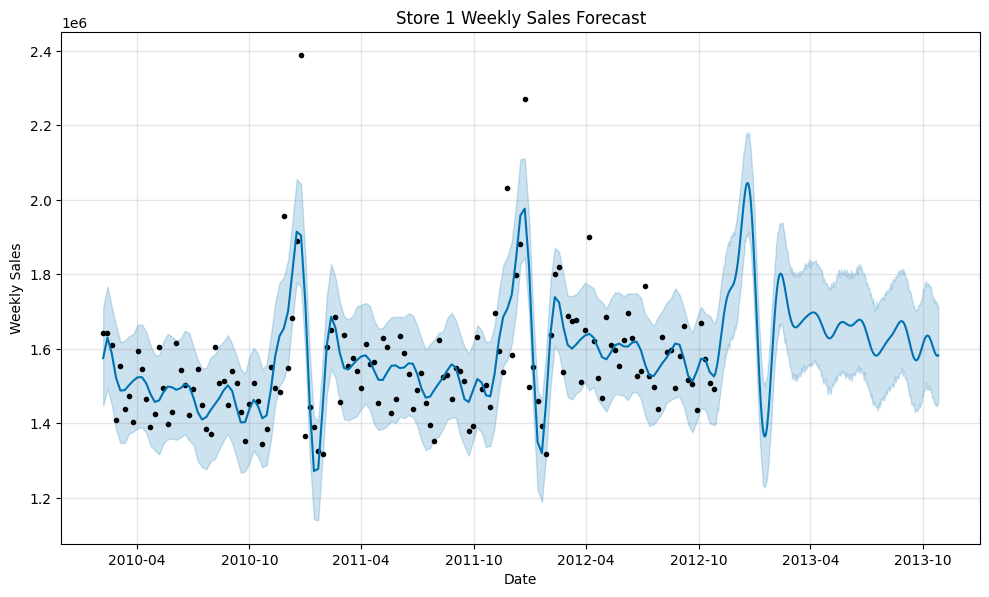

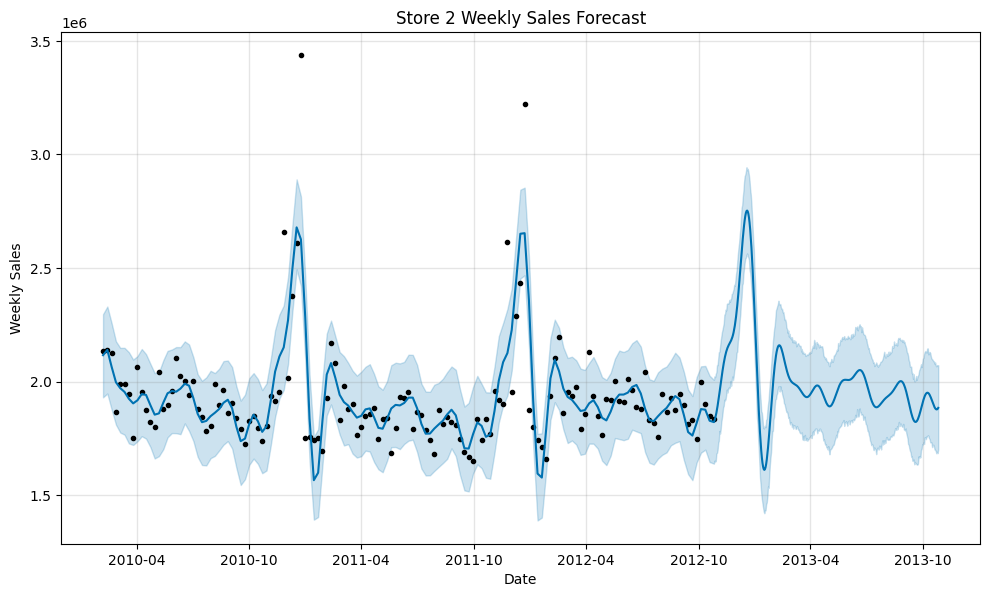

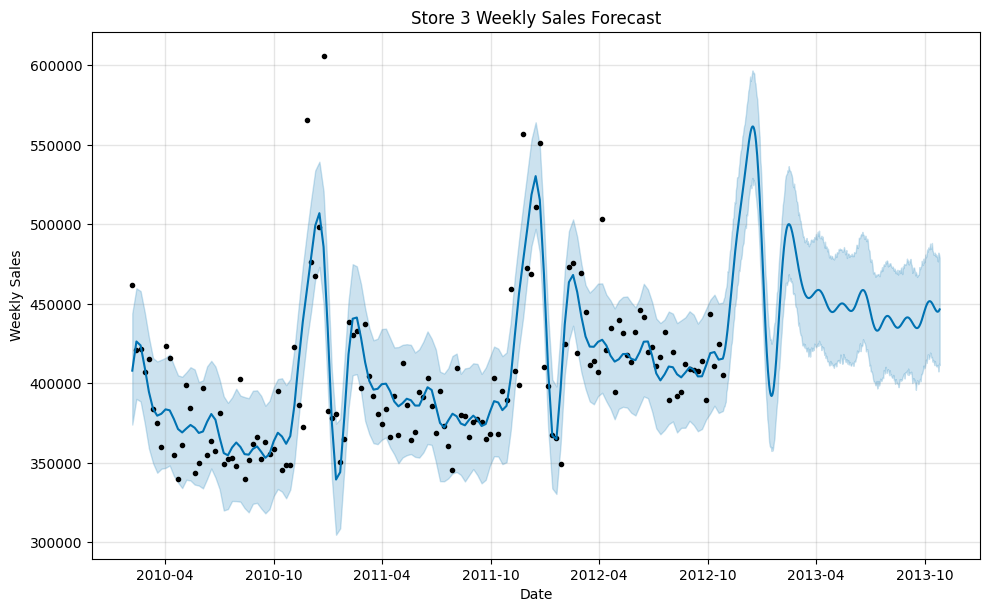

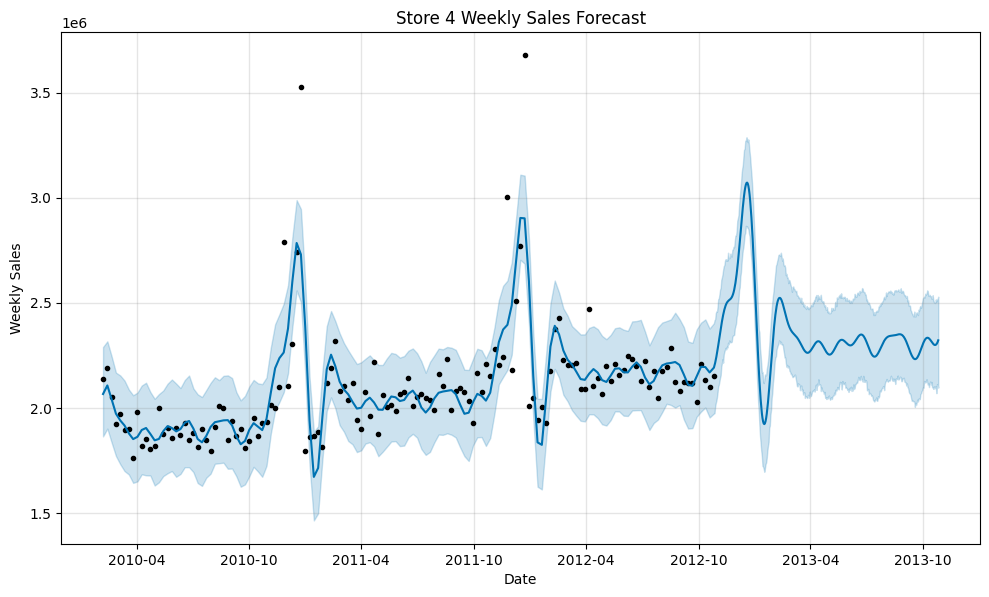

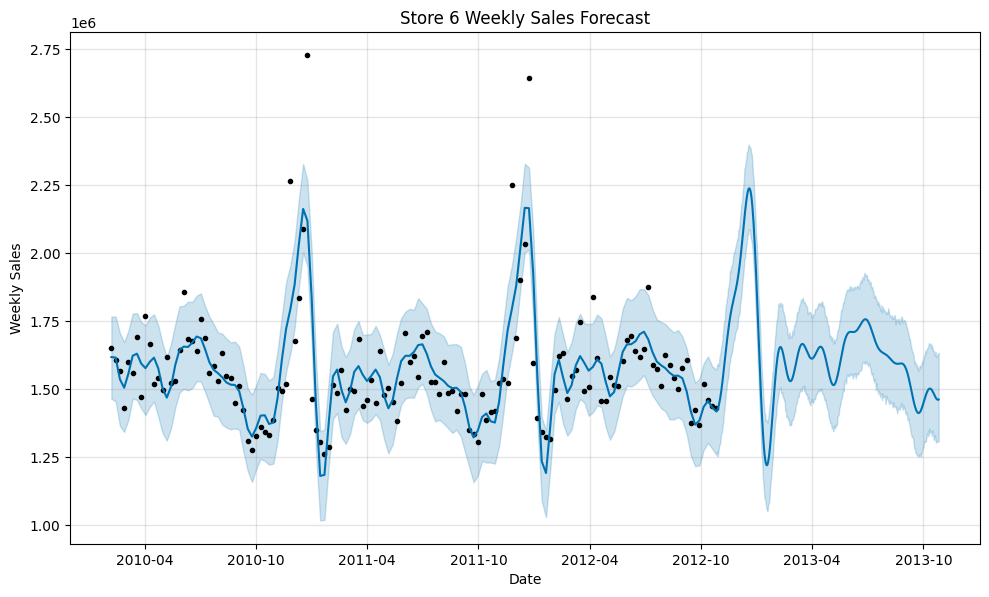

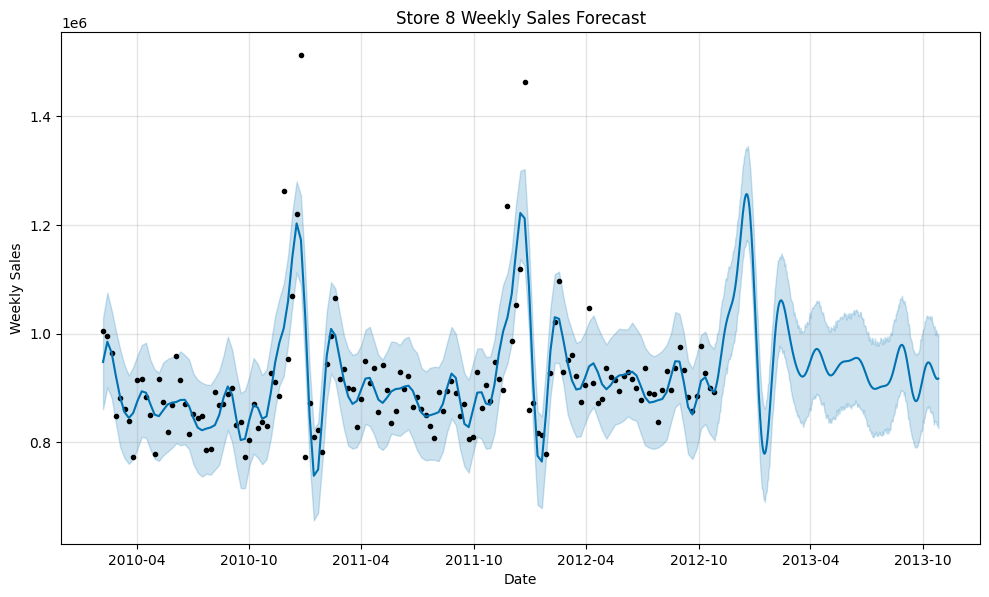

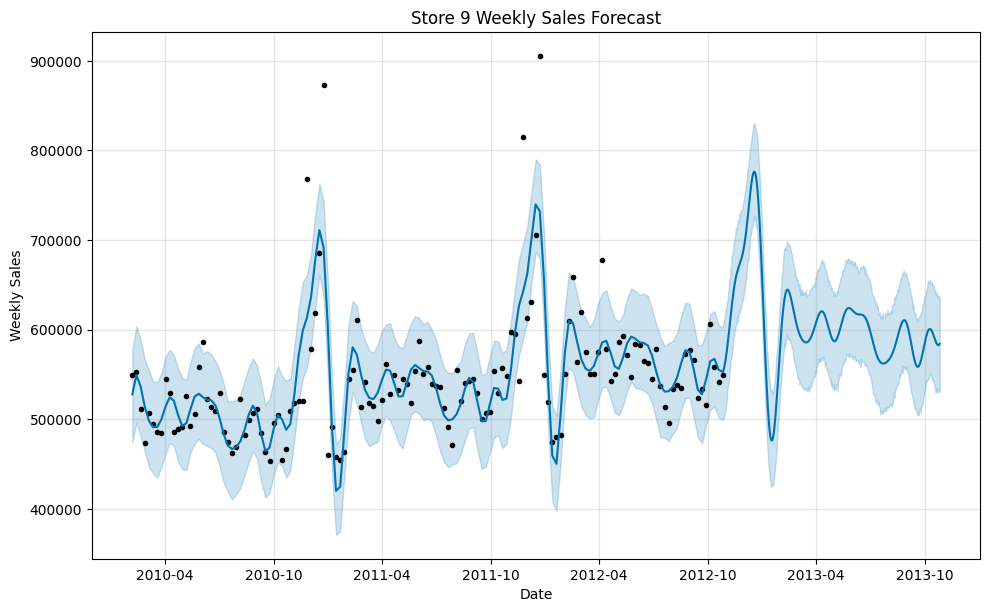

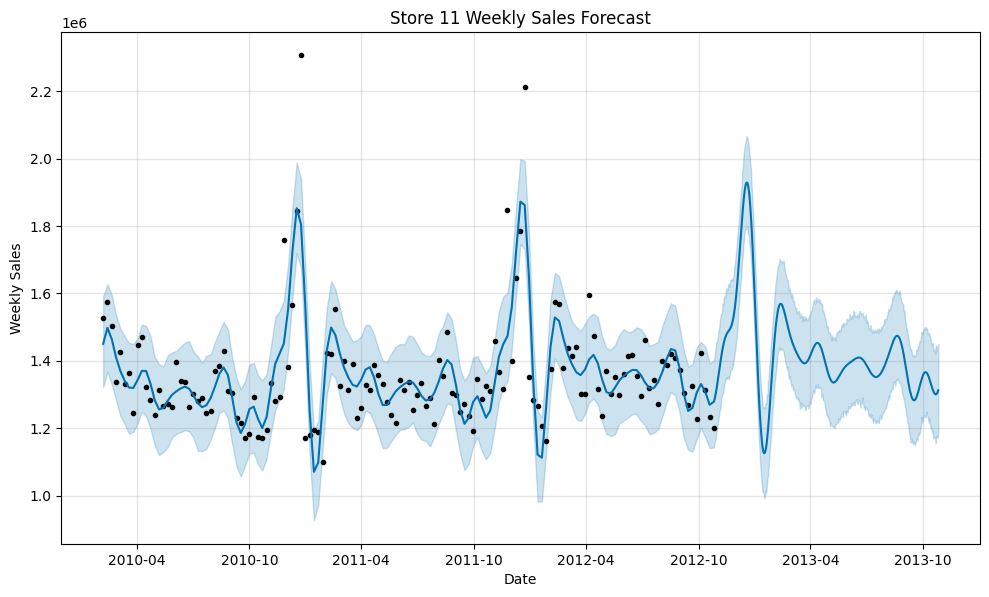

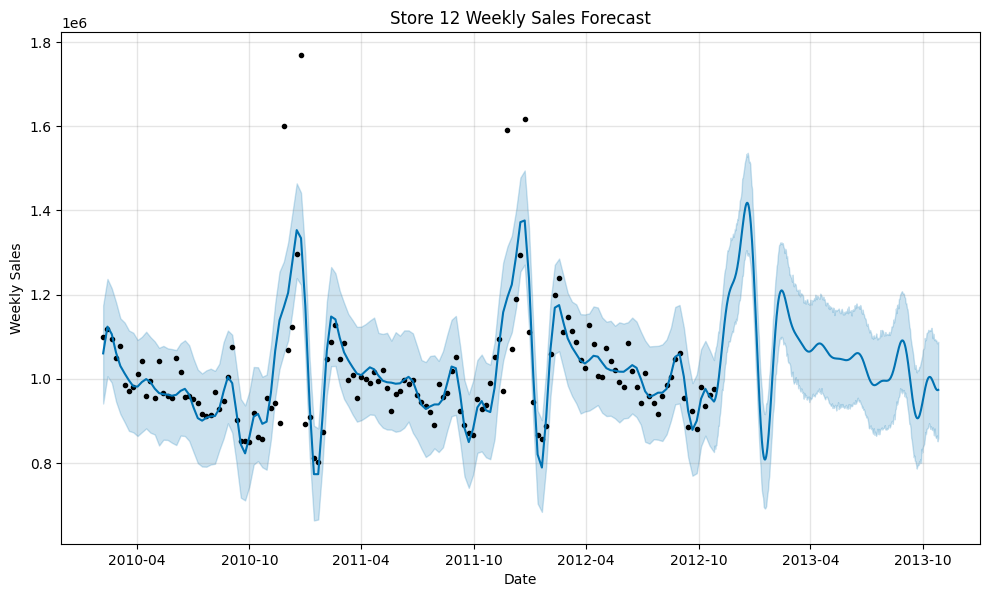

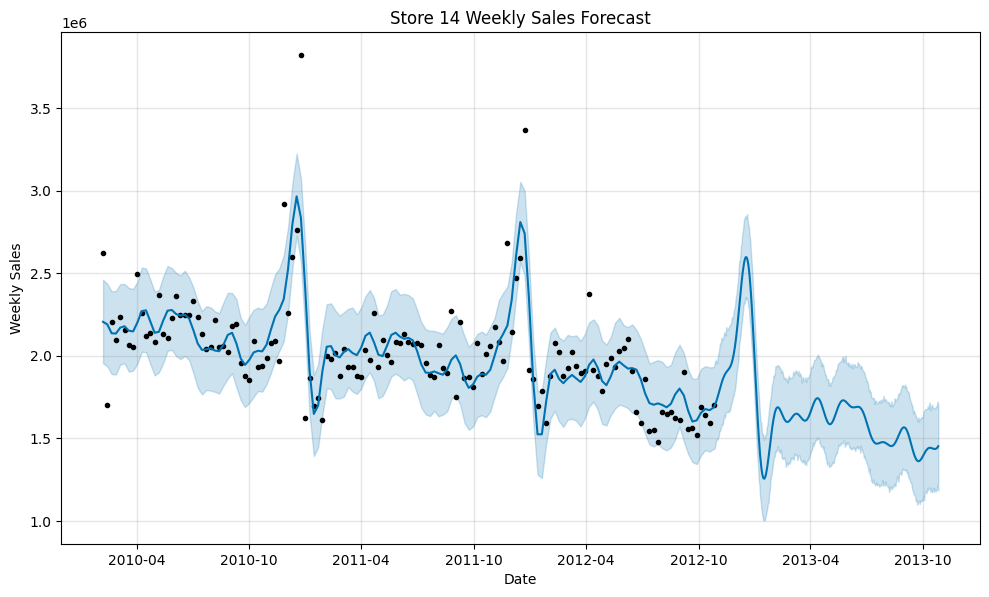

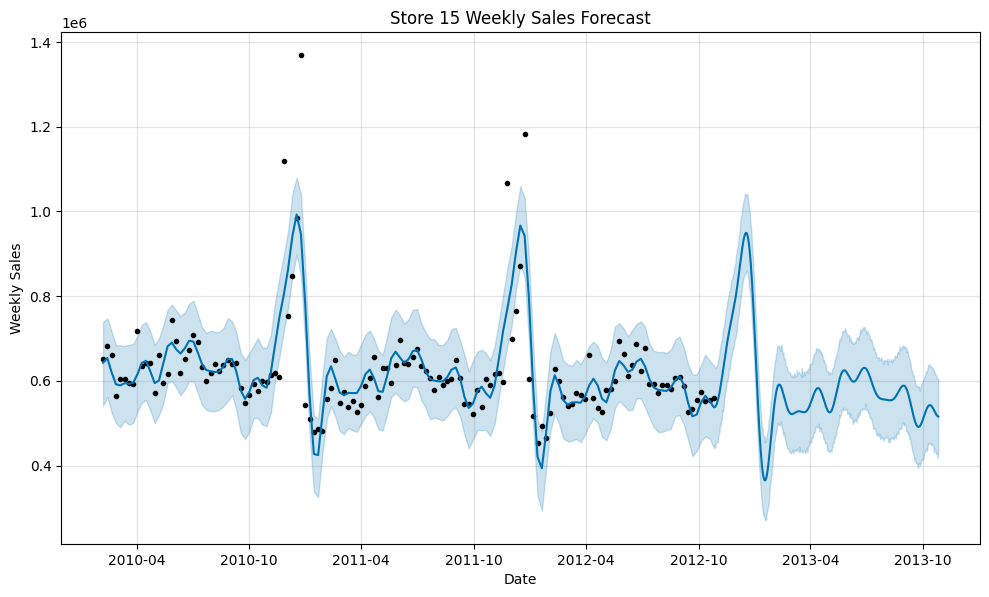

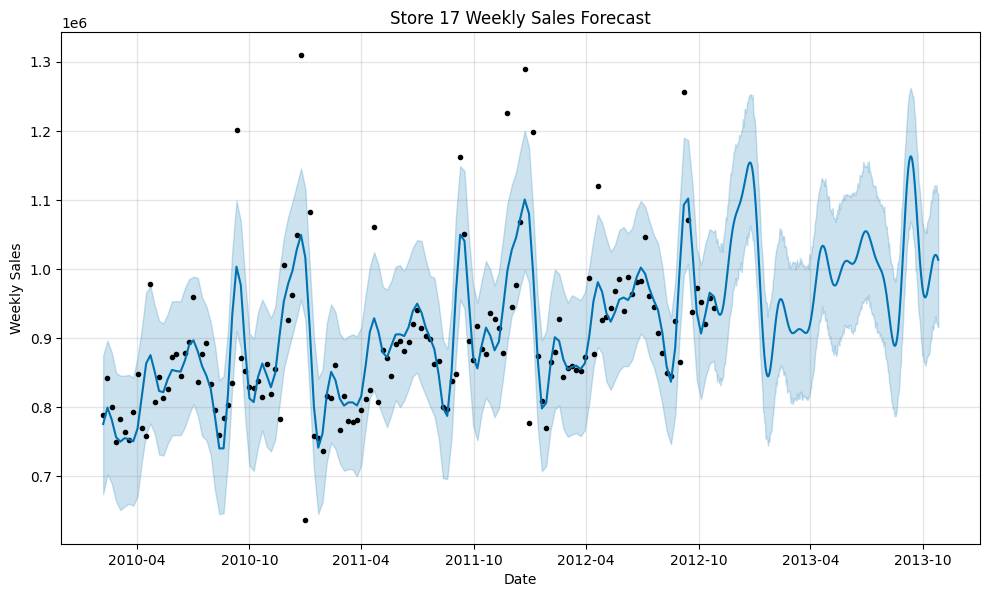

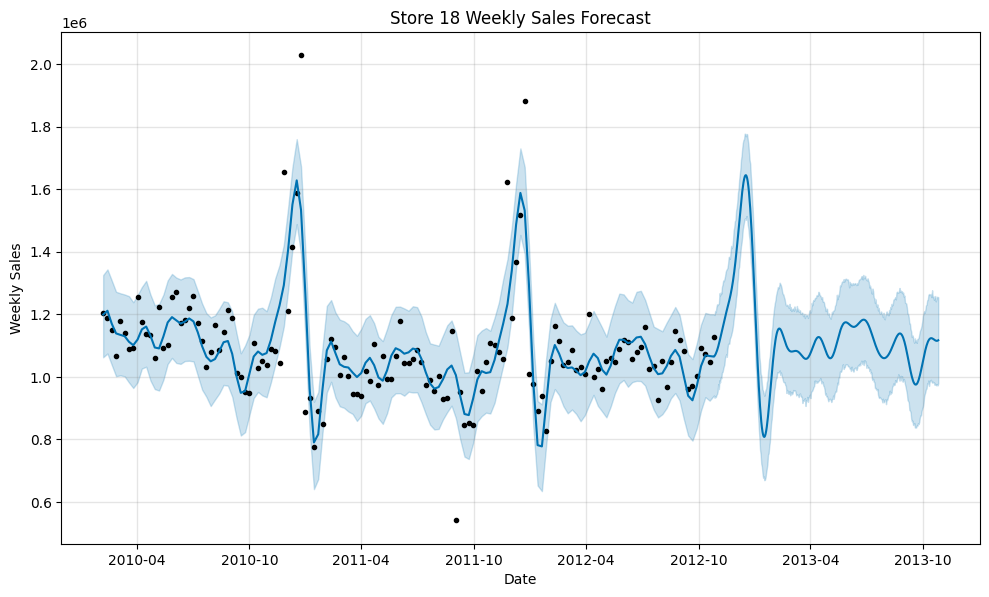

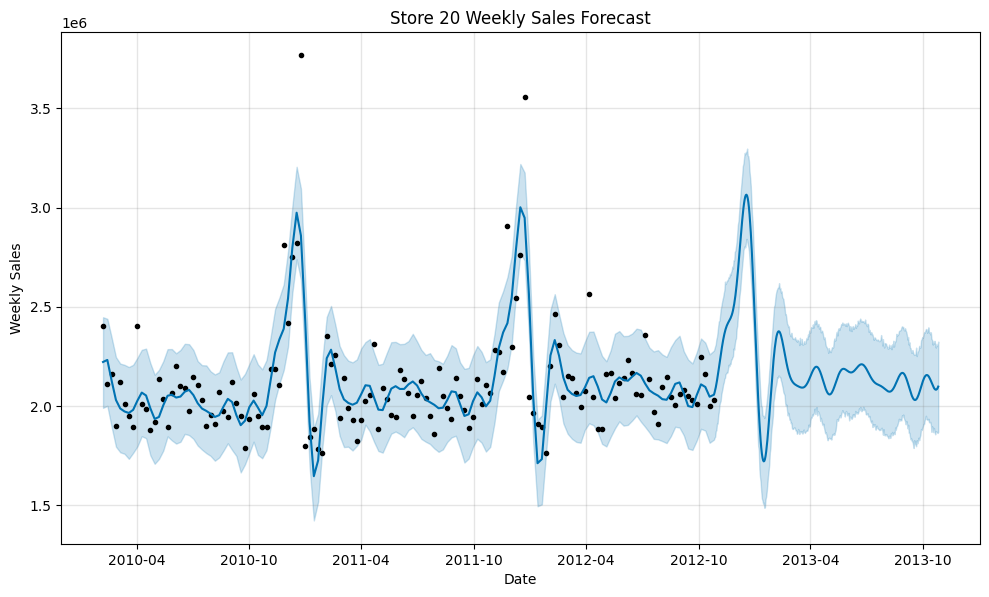

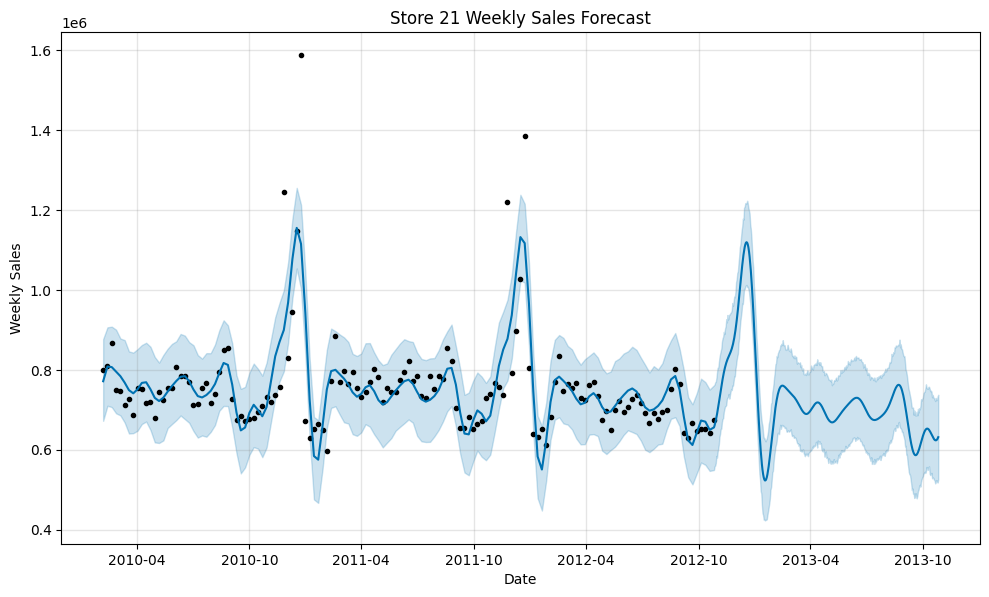

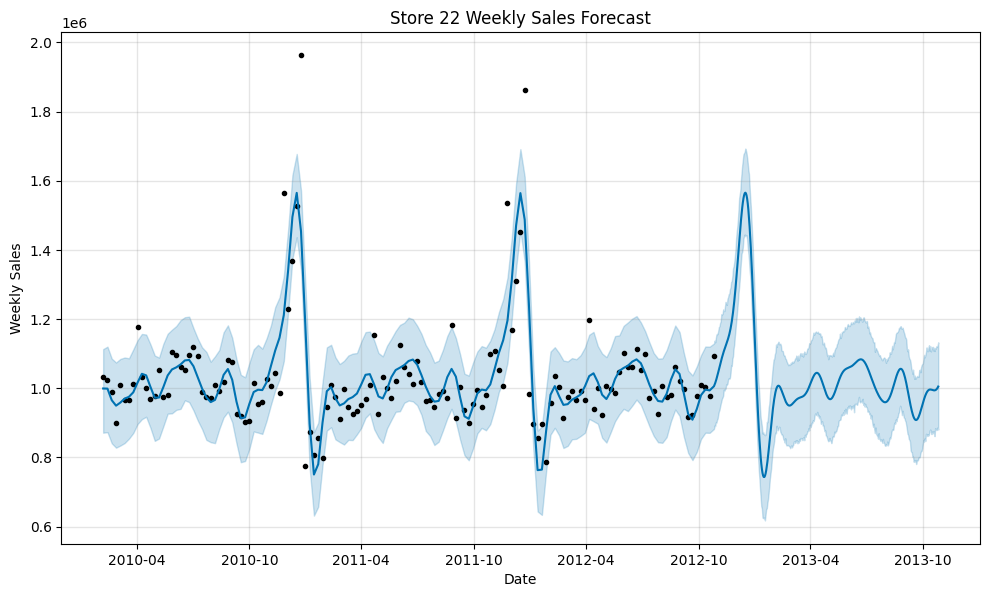

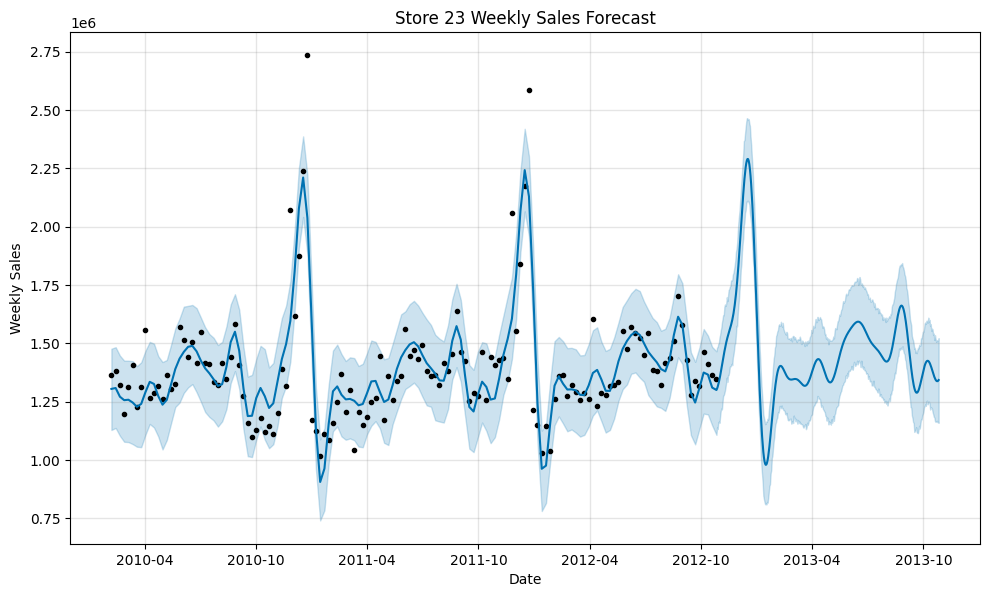

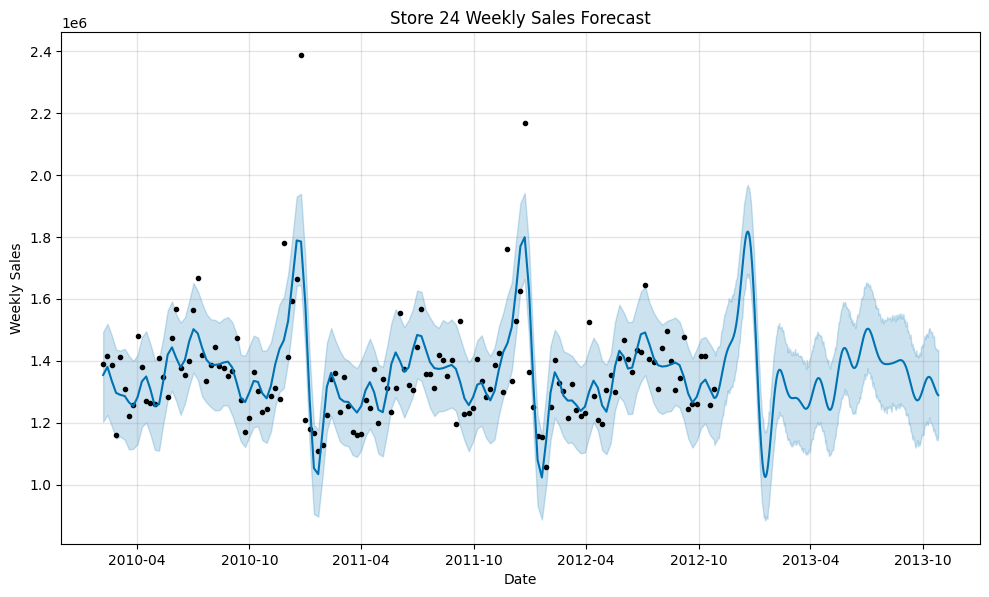

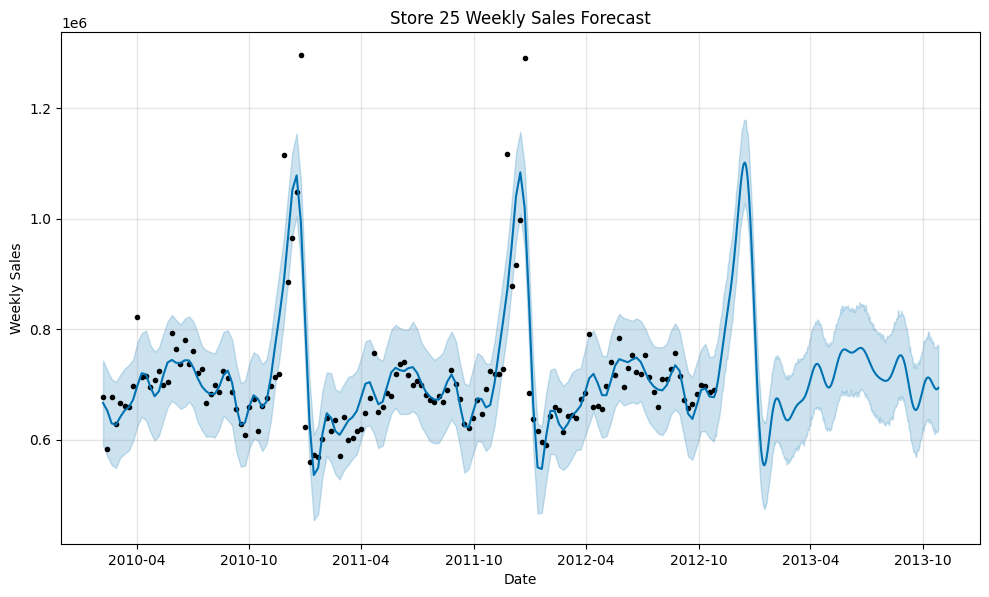

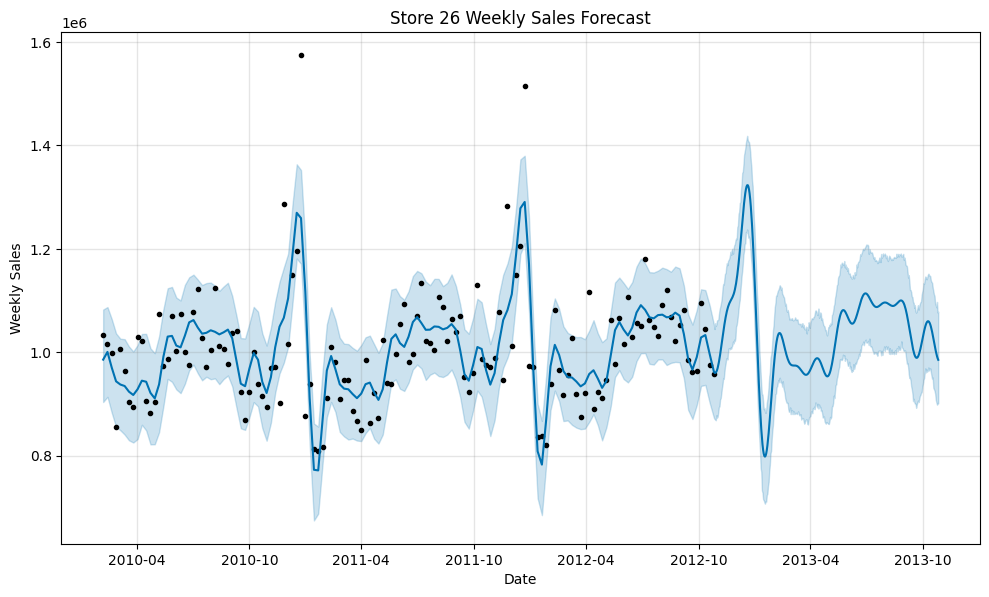

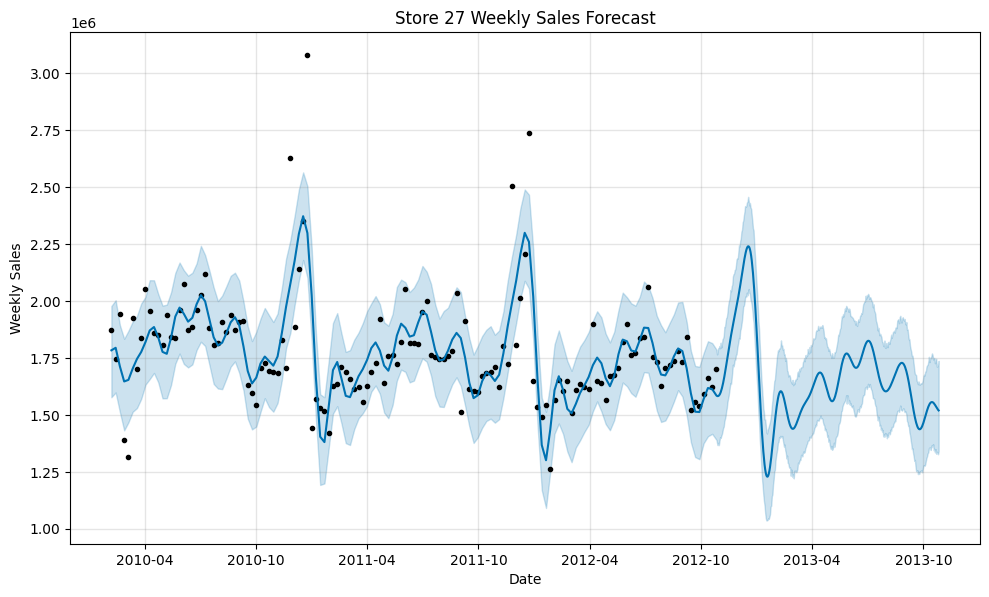

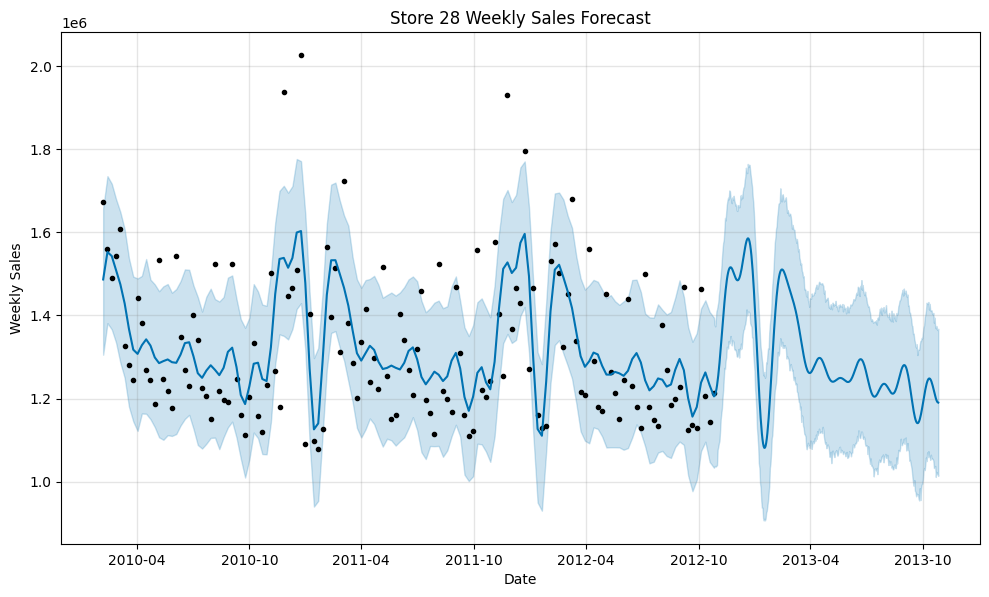

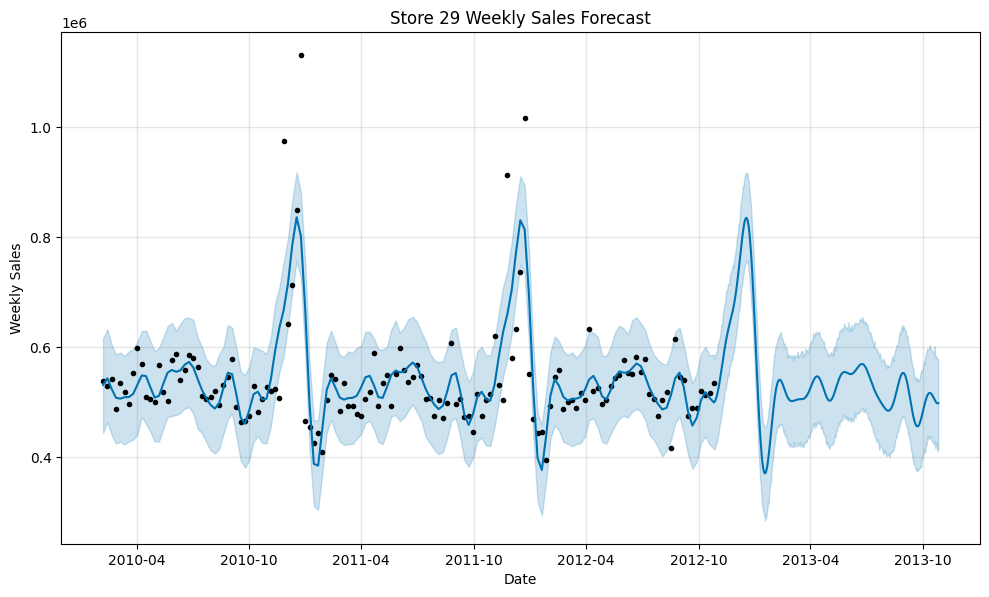

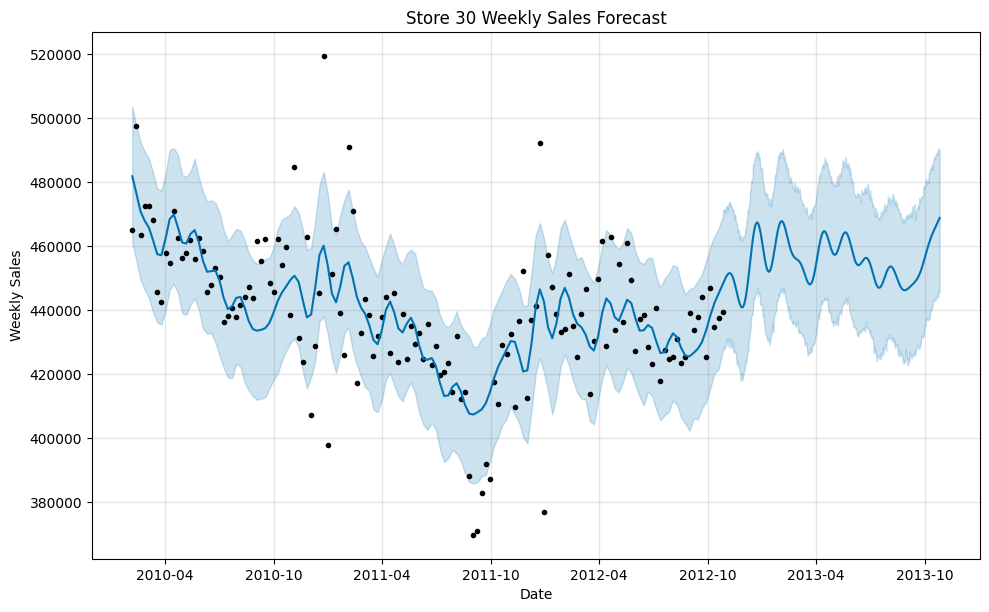

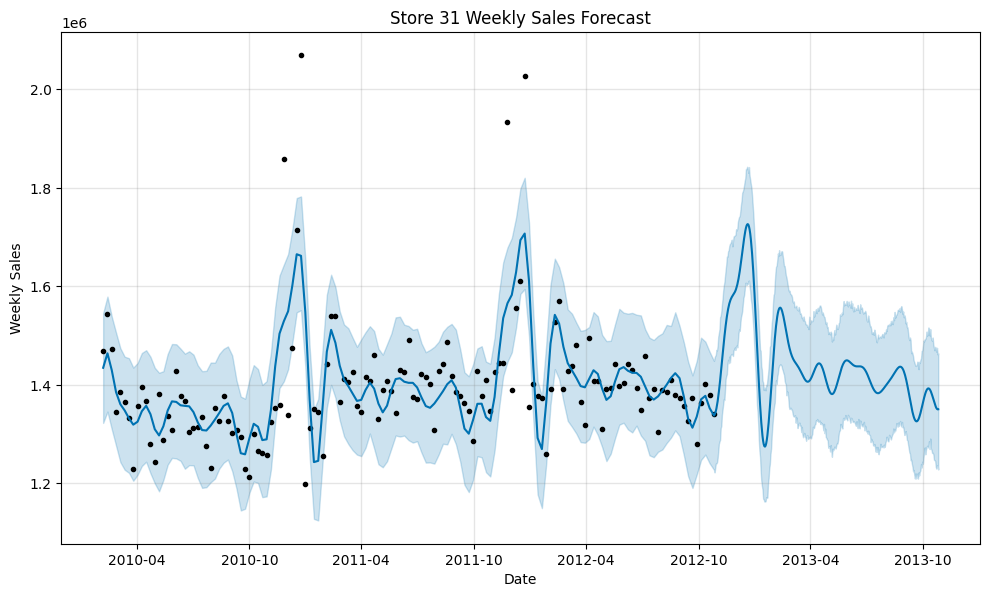

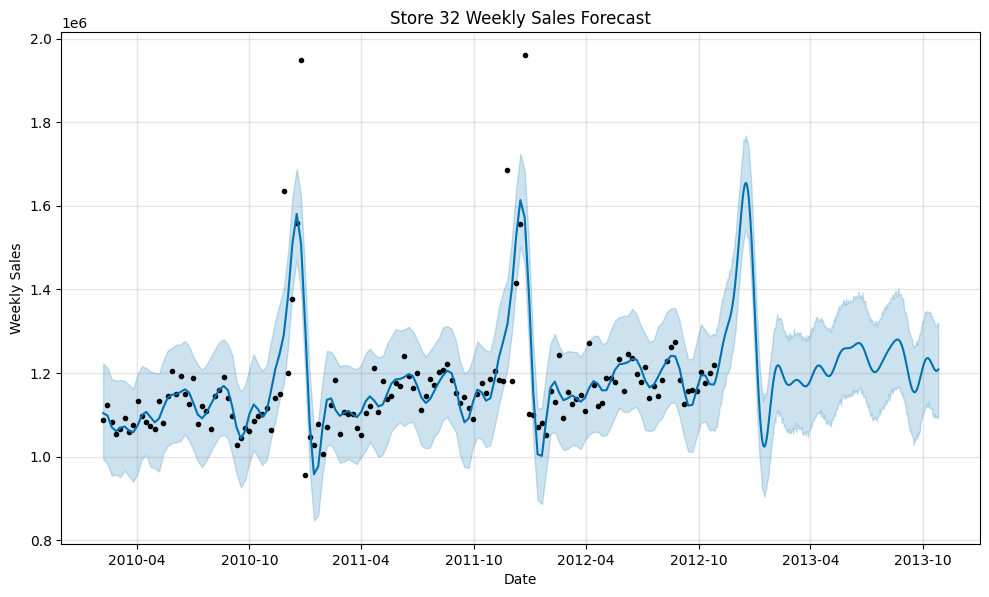

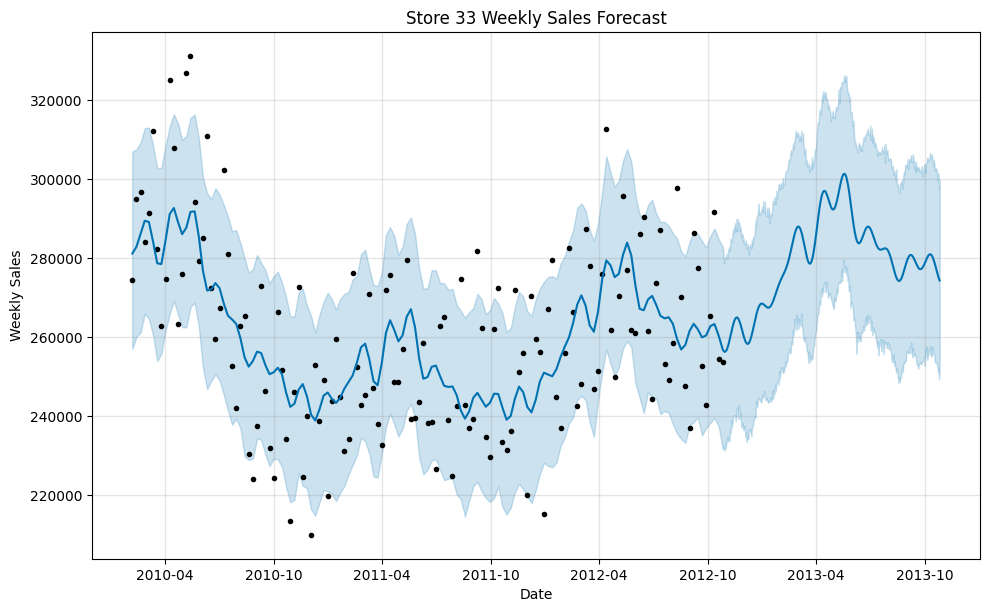

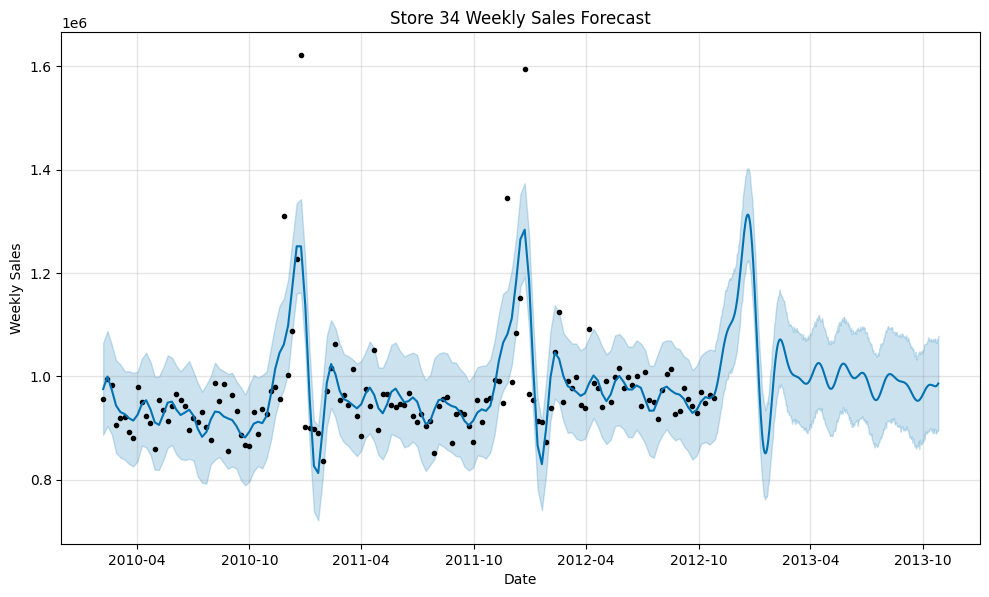

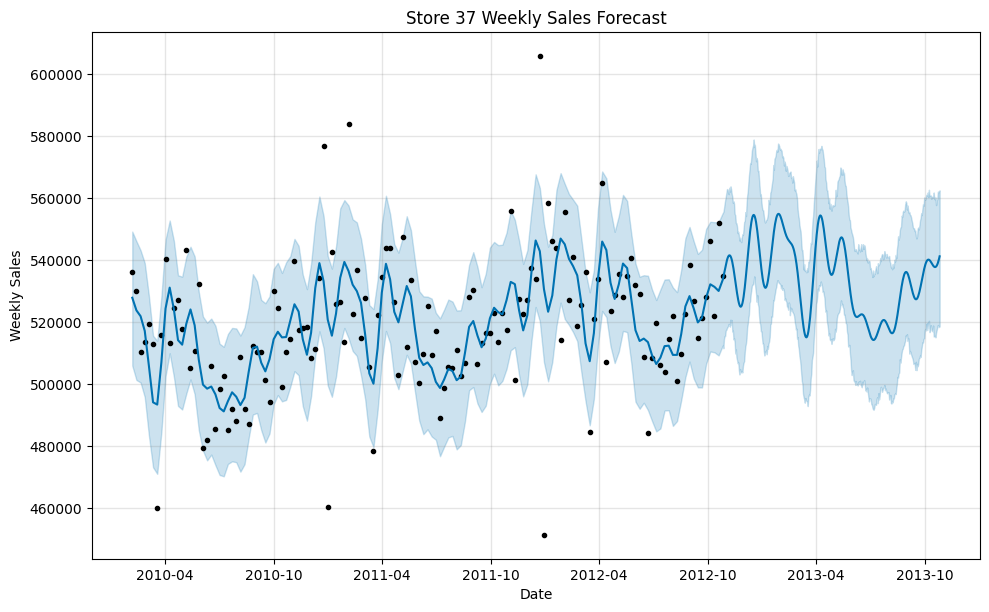

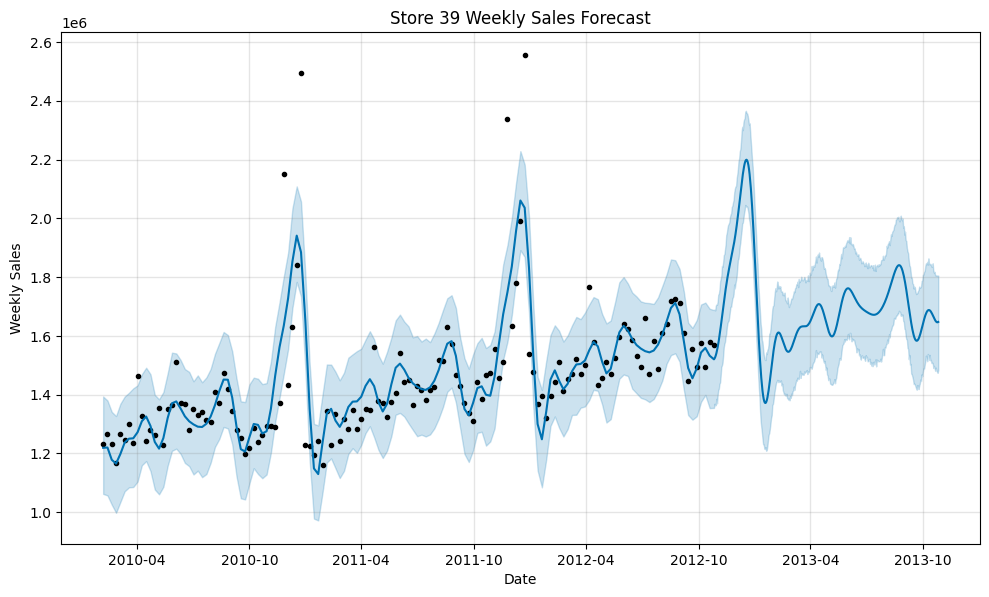

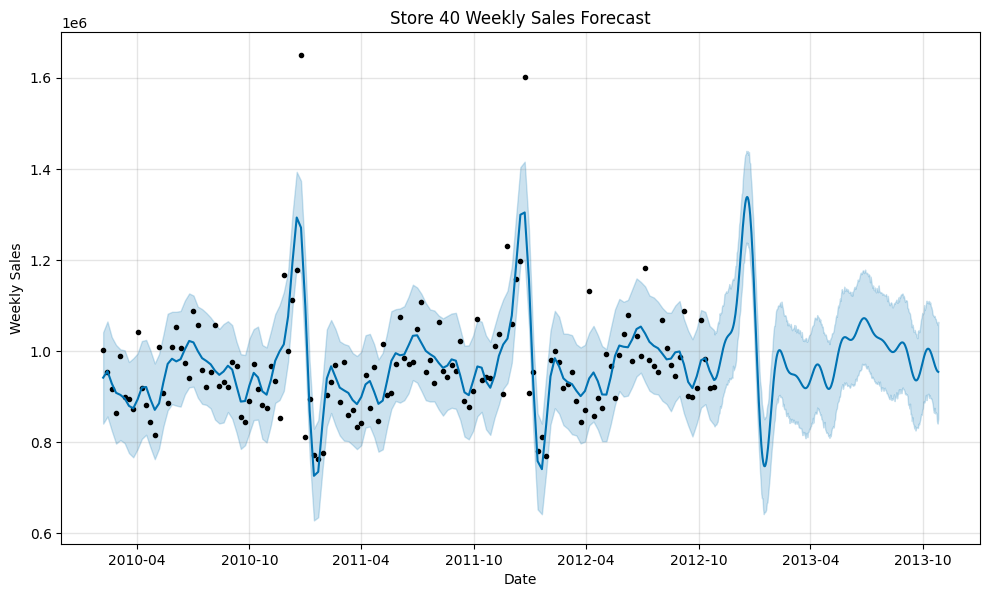

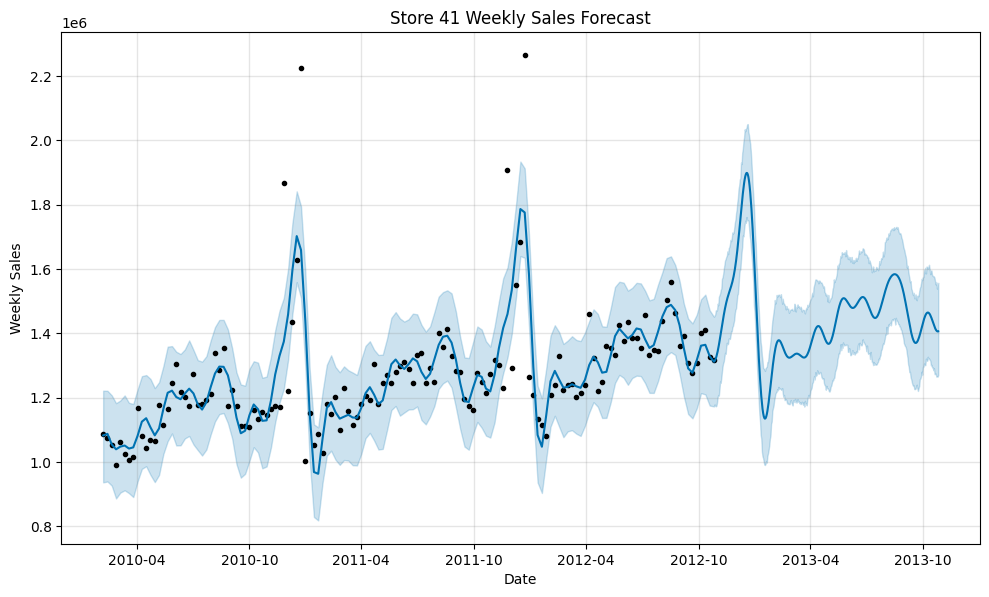

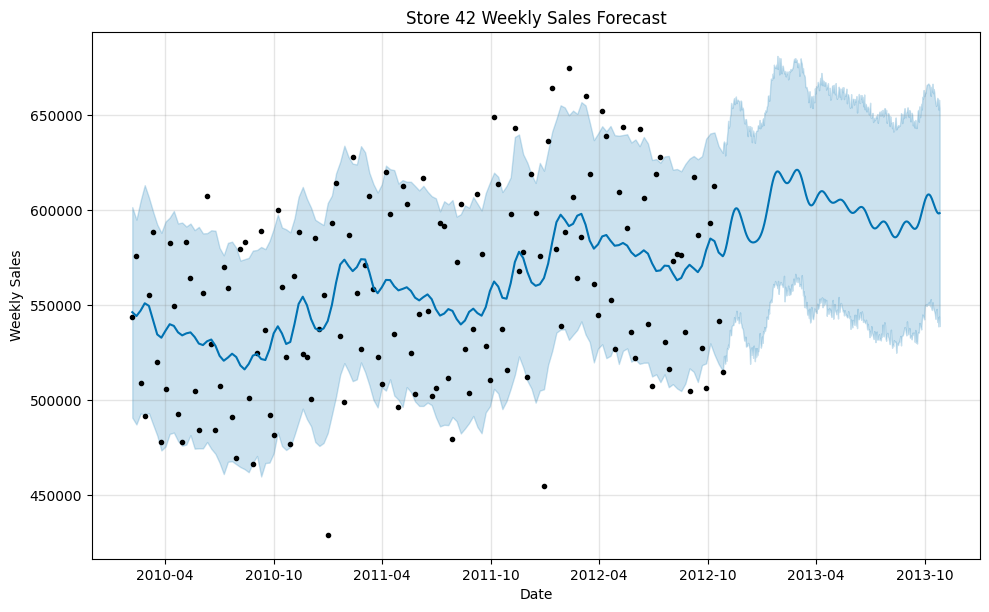

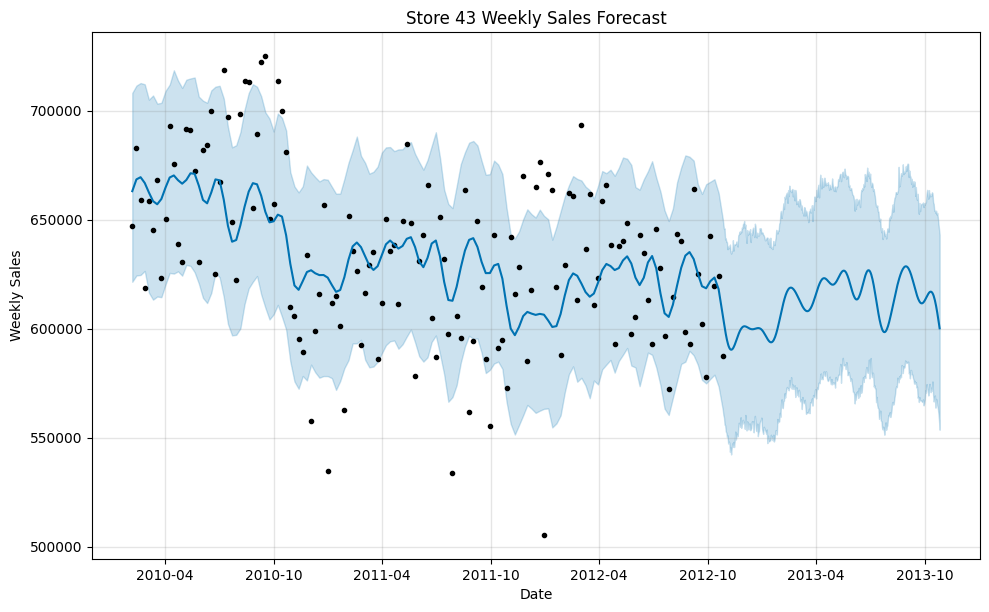

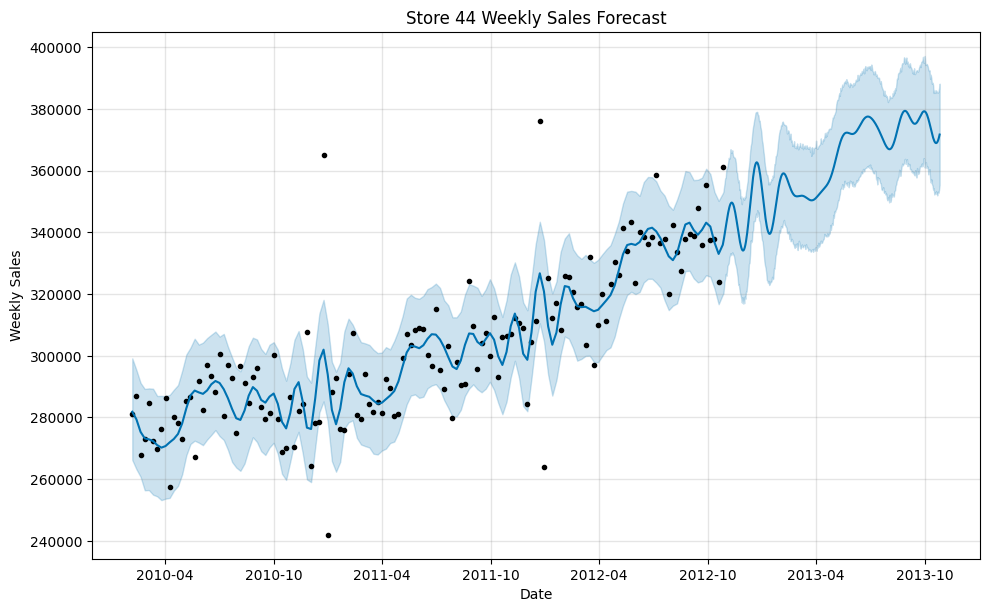

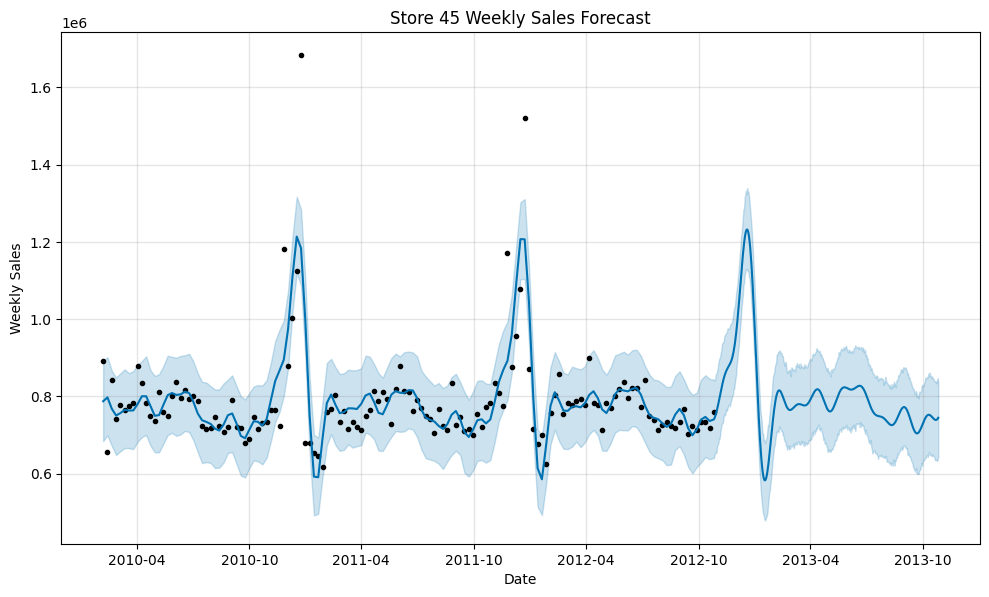

In [5]:
import logging
logging.getLogger('fbprophet').setLevel(logging.WARNING)

# Import and read the combined CSV file for all stores
application_df = pd.read_csv("walmart.csv")

# Function to create and fit Prophet model for a given store
def forecast_store_sales(store_df, store_name):
    # Preprocess the dataset for Prophet
    prophet_df = store_df[['Date', 'Weekly_Sales']]
    prophet_df = prophet_df.rename(columns={'Date': 'ds', 'Weekly_Sales': 'y'})

    # Specify the date format explicitly (e.g., 'DD/MM/YYYY')
    prophet_df['ds'] = pd.to_datetime(prophet_df['ds'], format='%d-%m-%Y')

    # Create and fit the Prophet model
    model = Prophet()
    model.fit(prophet_df)

    # Create DataFrame for future dates
    future_dates = model.make_future_dataframe(periods=365)  # Forecasting for 1 year (365 days) into the future

    # Make predictions
    forecast = model.predict(future_dates)

    # Visualize the forecast
    fig = model.plot(forecast)
    plt.xlabel('Date')
    plt.ylabel('Weekly Sales')
    plt.title(f'Store {store_name} Weekly Sales Forecast')

    # Save the forecast plot to a file (optional)
    plt.savefig(f"Store {store_name}_forecast.png")

    # Return the forecast DataFrame
    return forecast

# Group data by store identifier (e.g., store) and create forecasts for each store
all_forecasts = []
for store_name, store_df in application_df.groupby('Store'):
    forecast = forecast_store_sales(store_df, store_name)
    all_forecasts.append((store_name, forecast))
